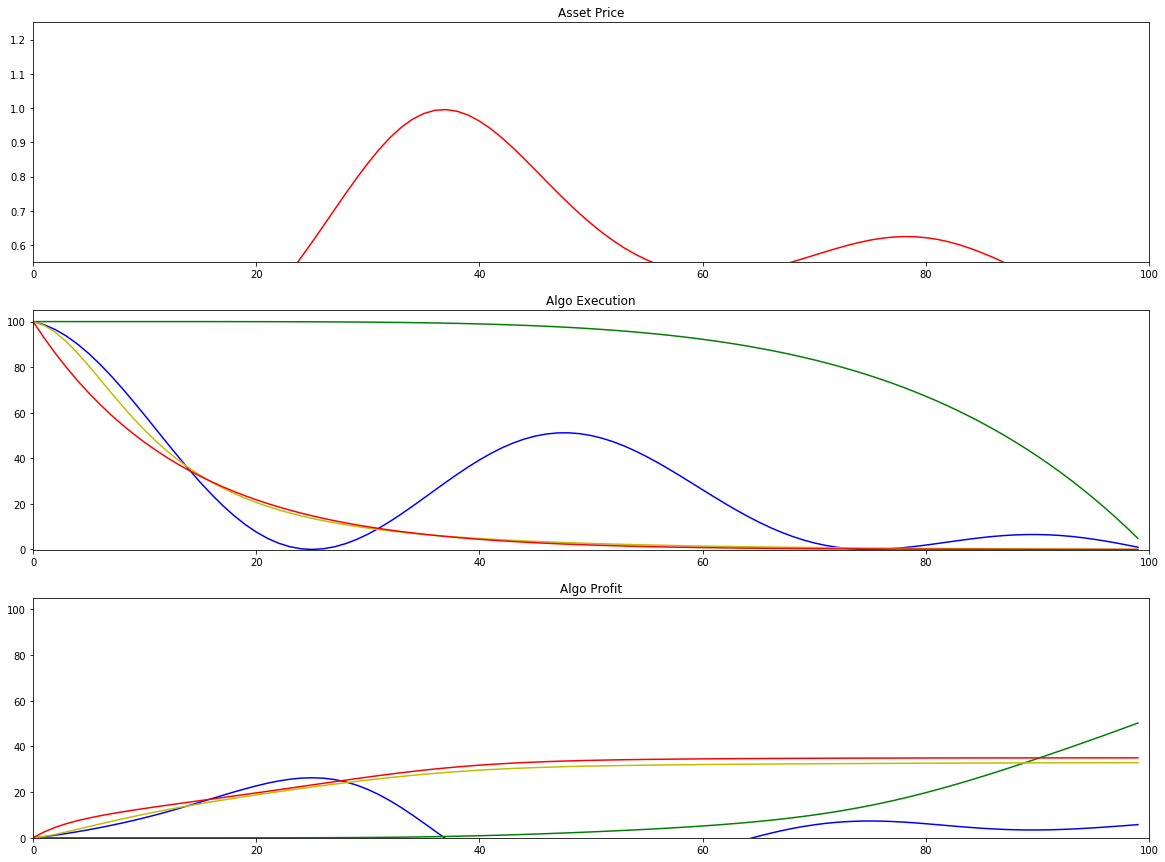

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML

def diff(x,L):
    a = 0
    for i,s in enumerate(strategies):
        a += L[i]*strategies[s][1](x)
    return a

a2 = 5
a3 = 72
a4 = 6.5
a1 = 1
strategies = {'team1': (lambda x: 100*(1 - x)*np.cos(2*np.pi*a1*x)**2 , 
                        lambda x : 100*(((-1)*np.cos(2*np.pi*a1*x)**2)-4*(1-x)*np.pi*a1*np.cos(2*np.pi*a1*x)*np.sin(2*np.pi*a1*x))),
              'team2': (lambda x: 100*(1-x**a2), 
                        lambda x : -100*a2*x**(a2-1) ),
              'team3': (lambda x: 100*(1-x)/(1+a3*x*x), 
                        lambda x: 100*(-1-2*a3*x+a3*x*x)/((1+a3*x*x)**2)),
              'team4': (lambda x: 100*(1-x)*np.exp(-a4*x), 
                        lambda x : 100*(-1+(a4*x)-a4)*np.exp(-a4*x))}

# get data
strats = pd.DataFrame(np.linspace(0, 1.0, 10000), columns=['x'])
for s in strategies:
    strats[s] = strats['x'].apply(strategies[s][0])

L = [10,10,10,10]
V = strats['team1']*L[0] + strats['team2']*L[1] +  strats['team3']*L[2] + strats['team4']*L[3]
VV = strats['x'].apply(lambda x : diff(x,L))


alpha = -0.0001
beta = 0.0001
a = np.exp(alpha * (np.sum(L)*100 - V))
b = np.exp(beta * VV)
p = a * b

profit = pd.DataFrame()
for s in strategies:
    profit[s] = (((strats[s]) - (strats[s]).shift(-1)) * a * b).cumsum()

fig, ax = plt.subplots(3, figsize=(20, 15))
xdata, ydata = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []
xdata4, ydata4 = [], []
xdata5, ydata5 = [], []
rxdata0, rydata0 = [], []
rxdata1, rydata1 = [], []
rxdata2, rydata2 = [], []
rxdata3, rydata3 = [], []

ln, = ax[0].plot([], [], 'r', animated=True)
l0, = ax[1].plot([], [], 'b', animated=True)
l1, = ax[1].plot([], [], 'g', animated=True)
l2, = ax[1].plot([], [], 'y', animated=True)
l3, = ax[1].plot([], [], 'r', animated=True)
r0, = ax[2].plot([], [], 'b', animated=True)
r1, = ax[2].plot([], [], 'g', animated=True)
r2, = ax[2].plot([], [], 'y', animated=True)
r3, = ax[2].plot([], [], 'r', animated=True)

f = range(100)


def init():
    ax[0].set_title('Asset Price')
    ax[0].set_xlim(0, 100)
    ax[0].set_ylim(0.55, 1.25)
    ax[1].set_title('Algo Execution')
    ax[1].set_xlim(0, 100)
    ax[1].set_ylim(-0.25, 105)
    ax[2].set_title('Algo Profit')
    ax[2].set_xlim(0, 100)
    ax[2].set_ylim(0, 105)
    ln.set_data(xdata, ydata)
    l0.set_data(xdata2, ydata2)
    l1.set_data(xdata3, ydata3)
    l2.set_data(xdata4, ydata4)
    l3.set_data(xdata5, ydata5)
    r0.set_data(rxdata0, rydata0)
    r1.set_data(rxdata1, rydata1)
    r2.set_data(rxdata2, rydata2)
    r3.set_data(rxdata3, rydata3)
    return ln, l0, l1, l2, l3, r0, r1, r2, r3

def update(frame):

    xdata.append(frame)
    ydata.append(p.iloc[100 * frame])
    xdata2.append(frame)
    ydata2.append(strats['team1'].iloc[100 * frame])
    xdata3.append(frame)
    ydata3.append(strats['team2'].iloc[100 * frame])
    xdata4.append(frame)
    ydata4.append(strats['team3'].iloc[100 * frame])
    xdata5.append(frame)
    ydata5.append(strats['team4'].iloc[100 * frame])
    rxdata0.append(frame)
    rxdata1.append(frame)
    rxdata2.append(frame)
    rxdata3.append(frame)
    rydata0.append(profit['team1'].iloc[100 * frame])
    rydata1.append(profit['team2'].iloc[100 * frame])
    rydata2.append(profit['team3'].iloc[100 * frame])
    rydata3.append(profit['team4'].iloc[100 * frame])

    ln.set_data(xdata, ydata)
    l0.set_data(xdata2, ydata2)
    l1.set_data(xdata3, ydata3)
    l2.set_data(xdata4, ydata4)
    l3.set_data(xdata5, ydata5)
    r0.set_data(rxdata0, rydata0)
    r1.set_data(rxdata1, rydata1)
    r2.set_data(rxdata2, rydata2)
    r3.set_data(rxdata3, rydata3)

    return ln, l0, l1, l2, l3, r0, r1, r2, r3


ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True)

HTML(ani.to_jshtml())